<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เตรียมโค้ด



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy.integrate import odeint 

%config InlineBackend.figure_format = 'retina'

# อิทธิพลการได้รับวัคซีน

In [24]:
def deriv (y, t,Nh, Lambda, Phi, Mu, Lamda, Nu1,Nu2,Nu3,theta, Beta, delta, Tau): 
    S1, S2, S3,V1,V2,V3,E1,E2,E3,Q1,Q2,Q3 = y
    dS1dt = Lambda+Phi*Q1-Mu*S1-Lamda*S1-Nu1*S1
    dS2dt = Lambda+Phi*Q2-Mu*S2-Lamda*S2-Nu2*S2
    dS3dt = Lambda+Phi*Q3-Mu*S3-Lamda*S3-Nu3*S3
    dV1dt = Nu1*S1+Mu*V1
    dV2dt = Nu2*S2+Mu*V2
    dV3dt = Nu3*S3+Mu*V3
    dE1dt = Lamda*S1-Mu*E1-theta*E1-Beta*E1
    dE2dt = Lamda*S2-Mu*E2-theta*E2-Beta*E2
    dE3dt = Lamda*S3-Mu*E3-theta*E3-Beta*E3
    dQ1dt = Beta*E1-delta*Q1-Mu*Q1-Phi*Q1-Tau*Q1
    dQ2dt = Beta*E2-delta*Q2-Mu*Q2-Phi*Q2-Tau*Q2
    dQ3dt = Beta*E3-delta*Q3-Mu*Q3-Phi*Q3-Tau*Q3
    return dS1dt, dS2dt, dS3dt, dV1dt, dV2dt, dV3dt, dE1dt,dE2dt,dE3dt, dQ1dt,dQ2dt,dQ3dt

In [25]:
#Initial number 
S01 = 330745021
S02 = 330745021
S03 = 330745021
V01 = 717362
V02 = 717362
V03 = 717362
E01 = 700000
E02 = 700000
E03 = 700000
Q01 = 674634
Q02 = 674634
Q03 = 674634
Nh = S01+S02+S03+V01+V02+V03+E01+E02+E03+Q01+Q02+Q03

# Time period (80 days)
t = np.arange(0,80,1)


In [27]:
# parameter value
Lambda =0.001
Phi = 0.005
Mu = 0.0013
Lamda = 0.000002
Nu1 =0.01
Nu2 = 0.5
Nu3 = 1
theta = 0.00049
Beta = 0 # กักตัว 0 วัน
delta = 0.00315
Tau = 0.52

# Constant rate 
L = 0.01
P = 0.05
M= 0.0013
LD = 0.000002
V1 = 0.01
V2 = 0.5
V3 = 1
T =0.00049
B =0
D =0.00315
J = 0.52


result = odeint(deriv,(S01, S02, S03, V01, V02, V03, E01, E02, E03, Q01, Q02, Q03), t, args = (Nh,L,P, M,LD,V1,V2,V3,T,B,D,J))
sm = pd.DataFrame(result, columns = ['Susceptible1','Susceptible2','Susceptible3','Vaccine1','Vaccine2','Vaccine3','Exposed1', 'Exposed2','Exposed3', 'Quarantine1', 'Quarantine2', 'Quarantine3'])
sm = sm.astype(np.int32)

## Susceptible

In [28]:
sm

,Susceptible1,Susceptible2,Susceptible3,Vaccine1,Vaccine2,Vaccine3,Exposed1,Exposed2,Exposed3,Quarantine1,Quarantine2,Quarantine3
0,330745021,330745021,330745021,717362,717362,717362,700000,700000,700000,674634,674634,674634
1,327053486,200365678,121531435,4009407,130876221,209843663,699405,699267,699165,379828,379828,379828
2,323392295,121380894,44659446,7268943,209896024,286961227,698804,698332,698068,213849,213849,213849
3,319765976,73531686,16412815,10496255,257935733,315573906,698197,697274,696876,120400,120400,120400
4,316176878,44544708,6032839,13691663,287207896,326363321,697583,696142,695651,67786,67786,67786
...,...,...,...,...,...,...,...,...,...,...,...,...
75,141723623,0,0,177713586,363584533,364526072,643078,613218,612638,0,0,0
76,140130880,0,0,179354940,364057500,365000264,642209,612121,611543,0,0,0
77,138556037,0,0,180982580,364531083,365475073,641339,611026,610449,0,0,0
78,136998893,0,0,182596668,365005281,365950500,640467,609933,609357,0,0,0


In [29]:
sm_Sus = sm[['Susceptible1','Susceptible2','Susceptible3']]
sm_Sus

,Susceptible1,Susceptible2,Susceptible3
0,330745021,330745021,330745021
1,327053486,200365678,121531435
2,323392295,121380894,44659446
3,319765976,73531686,16412815
4,316176878,44544708,6032839
...,...,...,...
75,141723623,0,0
76,140130880,0,0
77,138556037,0,0
78,136998893,0,0


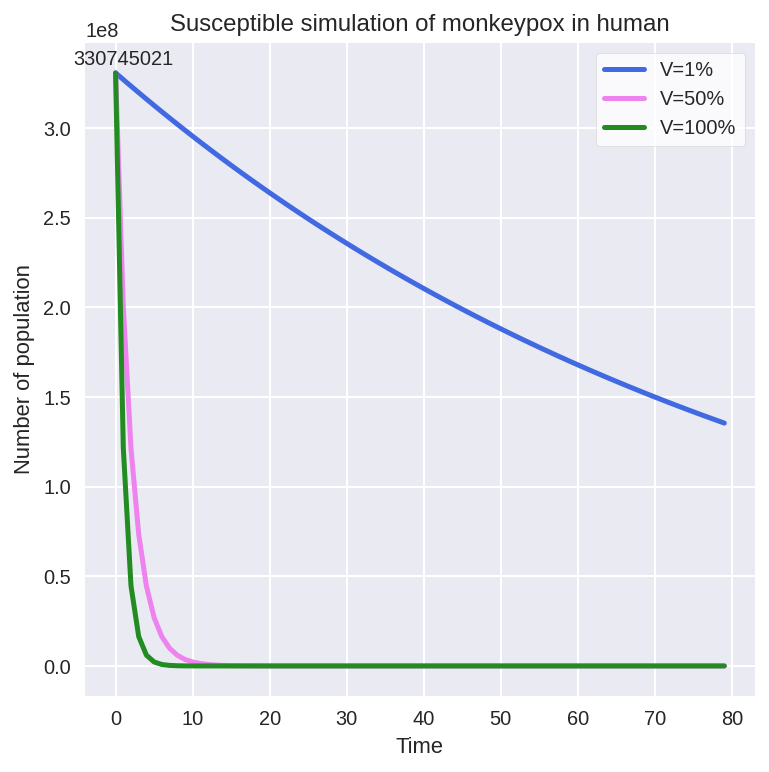

In [40]:
# plot the simulation
plt.figure (figsize = (6, 6)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('Susceptible simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(sm_Sus['Susceptible1'], c = 'royalblue', linewidth = 2.5,label = 'V=1%') 
    plt.plot(sm_Sus['Susceptible2'], c = 'violet', linewidth = 2.5,label = 'V=50%') 
    plt.plot(sm_Sus['Susceptible3'], c = 'forestgreen', linewidth = 2.5, label = 'V=100%') 
    plt.annotate(sm_Sus['Susceptible1'].max(),
                    (sm_Sus['Susceptible1'].idxmax(), sm_Sus['Susceptible1'].max()),
                    textcoords = 'offset points', xytext = (4,4),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') 
    plt.show()

## Vaccine

In [31]:
sm_Vac = sm[['Vaccine1','Vaccine2','Vaccine3']]
sm_Vac

,Vaccine1,Vaccine2,Vaccine3
0,717362,717362,717362
1,4009407,130876221,209843663
2,7268943,209896024,286961227
3,10496255,257935733,315573906
4,13691663,287207896,326363321
...,...,...,...
75,177713586,363584533,364526072
76,179354940,364057500,365000264
77,180982580,364531083,365475073
78,182596668,365005281,365950500


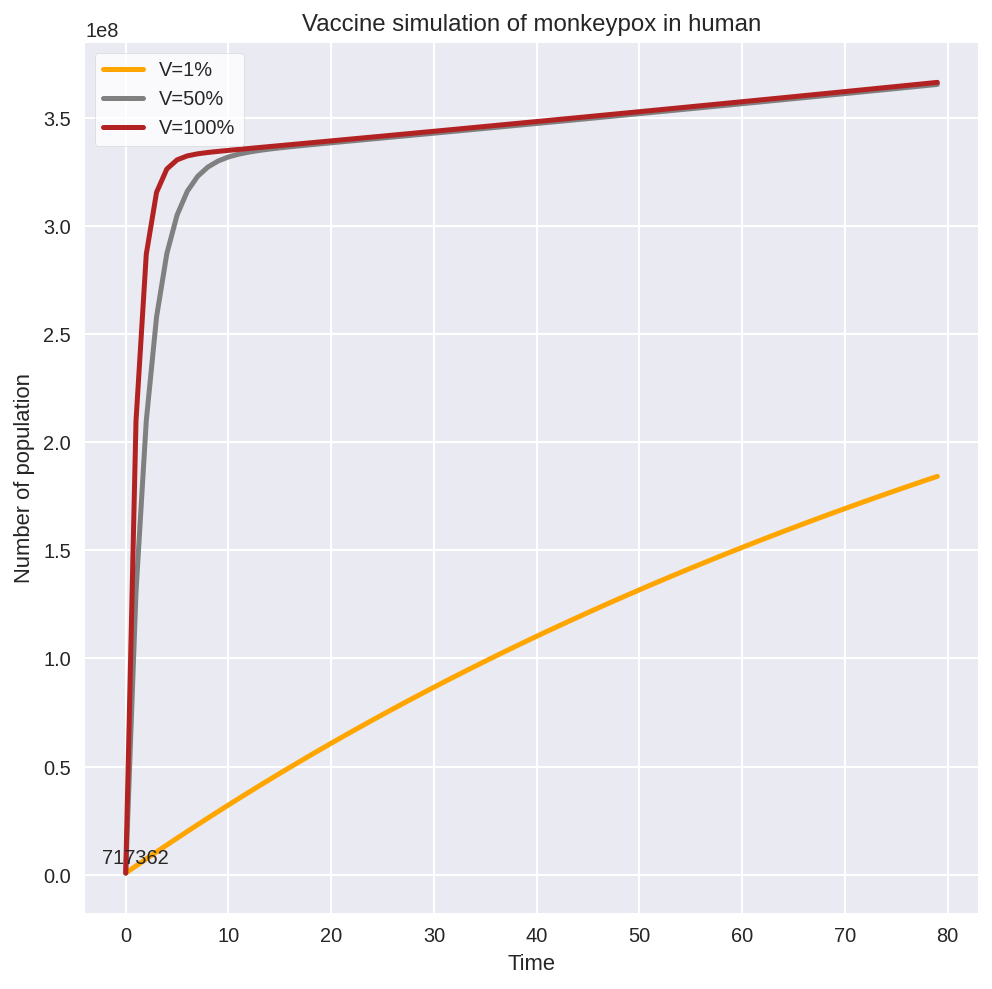

In [61]:
# plot the simulation
plt.figure (figsize = (8,8)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('Vaccine simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(sm_Vac['Vaccine1'], c = 'orange', linewidth = 2.5,label = 'V=1%') 
    plt.plot(sm_Vac['Vaccine2'], c = 'gray', linewidth = 2.5,label = 'V=50%') 
    plt.plot(sm_Vac['Vaccine3'], c = 'firebrick', linewidth = 2.5, label = 'V=100%') 
    plt.annotate(sm_Vac['Vaccine1'].min(),
                    (sm_Vac['Vaccine1'].idxmin(), sm_Vac['Vaccine1'].min()),
                    textcoords = 'offset points' , xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') 
    plt.show()

# อิทธิพล การกักตัว

In [54]:
def deriv (y, t,NhB, Lambda, Phi, Mu, Lamda, Nu,theta, Beta1, Beta2, Beta3, delta, Tau): 
    S1, S2, S3,E1,E2,E3,Q1,Q2,Q3 = y
    dS1dt = Lambda+Phi*Q1-Mu*S1-Lamda*S1-Nu*S1
    dS2dt = Lambda+Phi*Q2-Mu*S2-Lamda*S2-Nu*S2
    dS3dt = Lambda+Phi*Q3-Mu*S3-Lamda*S3-Nu*S3
    dE1dt = Lamda*S1-Mu*E1-theta*E1-Beta1*E1
    dE2dt = Lamda*S2-Mu*E2-theta*E2-Beta2*E2
    dE3dt = Lamda*S3-Mu*E3-theta*E3-Beta3*E3
    dQ1dt = Beta1*E1-delta*Q1-Mu*Q1-Phi*Q1-Tau*Q1
    dQ2dt = Beta2*E2-delta*Q2-Mu*Q2-Phi*Q2-Tau*Q2
    dQ3dt = Beta3*E3-delta*Q3-Mu*Q3-Phi*Q3-Tau*Q3
    return dS1dt, dS2dt, dS3dt,dE1dt,dE2dt,dE3dt, dQ1dt,dQ2dt,dQ3dt

In [55]:
#Initial number 
S01 = 330745021
S02 = 330745021
S03 = 330745021
E01 = 700000
E02 = 700000
E03 = 700000
Q01 = 674634
Q02 = 674634
Q03 = 674634
NhB = S01+S02+S03+E01+E02+E03+Q01+Q02+Q03

# Time period (80 days)
t = np.arange(0,80,1)


In [56]:
# parameter value
Lambda =0.001
Phi = 0.005
Mu = 0.0013
Lamda = 0.000002
Nu = 0 # ไม่ได้รับวัคซีน
theta = 0.00049
Beta1 = 1/3
Beta2 = 1/7
Beta3 = 1/14
delta = 0.00315
Tau = 0.52

# Constant rate 
L = 0.01
P = 0.05
M= 0.0013
LD = 0.000002
V = 0
T =0.00049
B1 =1/3
B2 = 1/7
B3 = 1/14
D =0.00315
J = 0.52

result_B = odeint(deriv,(S01, S02, S03, E01, E02, E03, Q01, Q02, Q03), t, args = (NhB,L,P, M,LD,V,T,B1,B2,B3,D,J))
smB = pd.DataFrame(result_B, columns = ['Susceptible1','Susceptible2','Susceptible3','Exposed1', 'Exposed2','Exposed3', 'Quarantine1', 'Quarantine2', 'Quarantine3'])
smB = smB.astype(np.int32)

In [57]:
smB

,Susceptible1,Susceptible2,Susceptible3,Exposed1,Exposed2,Exposed3,Quarantine1,Quarantine2,Quarantine3
0,330745021,330745021,330745021,700000,700000,700000,674634,674634,674634
1,330344649,330342294,330341327,501236,606344,651215,528333,450203,416396
2,329938008,329931295,329928274,359070,525301,605875,403820,314435,268457
3,329526282,329515443,329510069,257385,455171,563734,303573,229852,182798
4,329110652,329096717,329089091,184654,394486,524568,225571,175184,132370
...,...,...,...,...,...,...,...,...,...
75,300086939,300086615,300085775,1797,4200,11192,1045,1048,1445
76,299696532,299696209,299695389,1795,4193,10980,1044,1046,1415
77,299306633,299306310,299305510,1793,4186,10783,1042,1044,1387
78,298917242,298916919,298916136,1790,4179,10598,1041,1042,1361


## Exposed

In [58]:
sm_Exp = smB[['Exposed1','Exposed2','Exposed3']]
sm_Exp

,Exposed1,Exposed2,Exposed3
0,700000,700000,700000
1,501236,606344,651215
2,359070,525301,605875
3,257385,455171,563734
4,184654,394486,524568
...,...,...,...
75,1797,4200,11192
76,1795,4193,10980
77,1793,4186,10783
78,1790,4179,10598


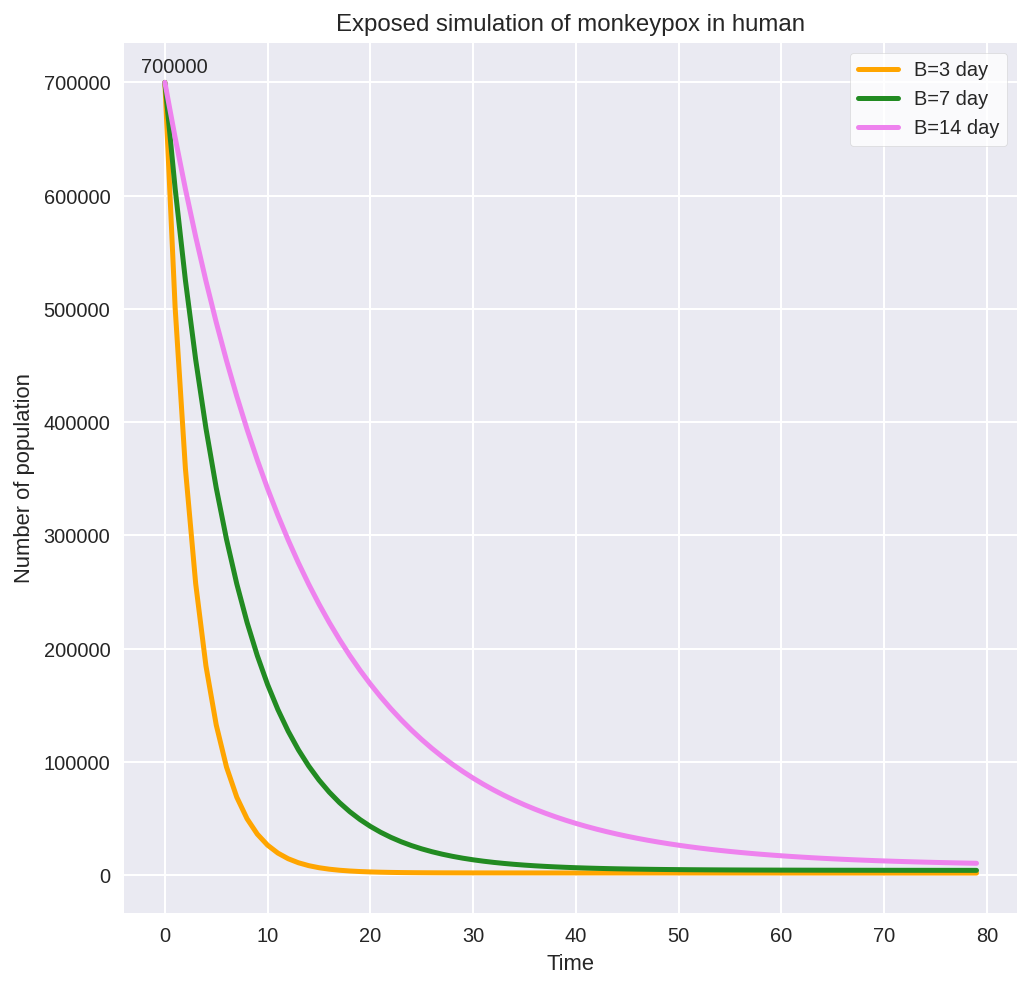

In [60]:
# plot the simulation
plt.figure (figsize = (8,8)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('Exposed simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(sm_Exp['Exposed1'], c = 'orange', linewidth = 2.5,label = 'B=3 day') 
    plt.plot(sm_Exp['Exposed2'], c = 'forestgreen', linewidth = 2.5,label = 'B=7 day') 
    plt.plot(sm_Exp['Exposed3'], c = 'violet', linewidth = 2.5, label = 'B=14 day') 
    plt.annotate(sm_Exp['Exposed1'].max(),
                    (sm_Exp['Exposed1'].idxmax(), sm_Exp['Exposed1'].max()),
                    textcoords = 'offset points' , xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') 
    plt.show()

##Quarantine

In [62]:
sm_Qua = smB[['Quarantine1','Quarantine2','Quarantine3']]
sm_Qua

,Quarantine1,Quarantine2,Quarantine3
0,674634,674634,674634
1,528333,450203,416396
2,403820,314435,268457
3,303573,229852,182798
4,225571,175184,132370
...,...,...,...
75,1045,1048,1445
76,1044,1046,1415
77,1042,1044,1387
78,1041,1042,1361


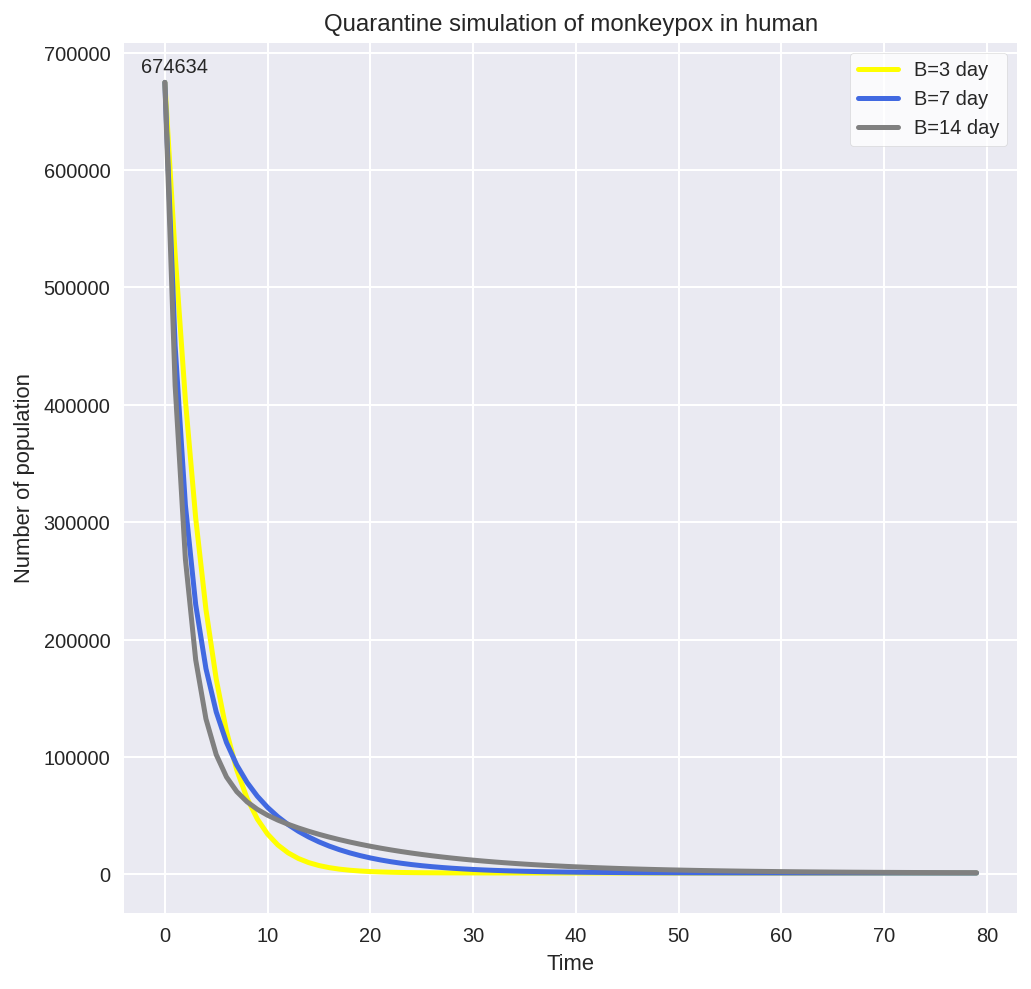

In [63]:
# plot the simulation
plt.figure (figsize = (8,8)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('Quarantine simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(sm_Qua['Quarantine1'], c = 'yellow', linewidth = 2.5,label = 'B=3 day') 
    plt.plot(sm_Qua['Quarantine2'], c = 'royalblue', linewidth = 2.5,label = 'B=7 day') 
    plt.plot(sm_Qua['Quarantine3'], c = 'gray', linewidth = 2.5, label = 'B=14 day') 
    plt.annotate(sm_Qua['Quarantine1'].max(),
                    (sm_Qua['Quarantine1'].idxmax(), sm_Qua['Quarantine1'].max()),
                    textcoords = 'offset points' , xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') 
    plt.show()